In [2]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Carga de datos JSON
with open('arraysPartidasResultado.json') as file:
    data_results = json.load(file)

with open('caracteristicas_campeones.json') as file:
    data_champions = json.load(file)

# Transformación de los datos de campeones en diccionario
champions_features = {champ['Key']: champ for champ in data_champions}

# Cálculo de medias de características
features_to_average = ['Difficulty', 'HP', 'Armor', 'HPRegen', 'AttackDamage', 'AttackSpeed']
average_features = {feature: sum(champ[feature] for champ in champions_features.values()) / len(champions_features) for feature in features_to_average}

# Preparación de DataFrame para datos combinados
combined_data = []

for match in data_results:
    match_result = match[0]
    champion_ids = match[1:]
    match_features = []

    for champ_id in champion_ids:
        if champ_id in champions_features:
            champ_data = champions_features[champ_id]
            match_features.extend([
                champ_data['Difficulty'],
                champ_data['HP'],
                champ_data['Armor'],
                champ_data['HPRegen'],
                champ_data['AttackDamage'],
                champ_data['AttackSpeed']
            ])
        else:
            match_features.extend([average_features[feat] for feat in features_to_average])

    combined_data.append([match_result] + match_features)

column_names = ['Result'] + [f'Champ{i}_{feat}' for i in range(1, 11) for feat in features_to_average]
df_combined = pd.DataFrame(combined_data, columns=column_names)

# Dividir los datos en características y objetivo
X = df_combined.drop('Result', axis=1)
y = df_combined['Result']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación y entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluación del modelo en el conjunto de entrenamiento y prueba
train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Validation Accuracy:", accuracy_score(y_test, test_predictions))


Train Accuracy: 0.5630328314892074
Validation Accuracy: 0.5495103373231773


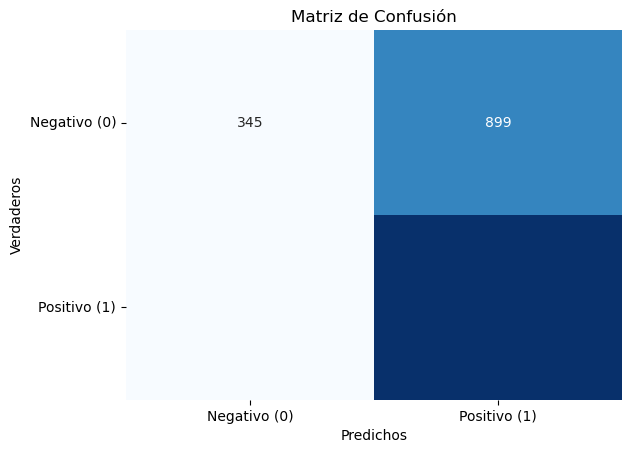

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Simulando datos de predicciones y verdaderos valores (estos deberías reemplazar con tus propios datos)
y_true = model.predict(X_test_scaled) # Verdaderos valores

y_pred = model.predict(X_test_scaled)
# Generando la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizando la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predichos')
plt.ylabel('Verdaderos')
plt.xticks([0.5, 1.5], ['Negativo (0)', 'Positivo (1)'])
plt.yticks([0.5, 1.5], ['Negativo (0)', 'Positivo (1)'], rotation=0)
plt.show()


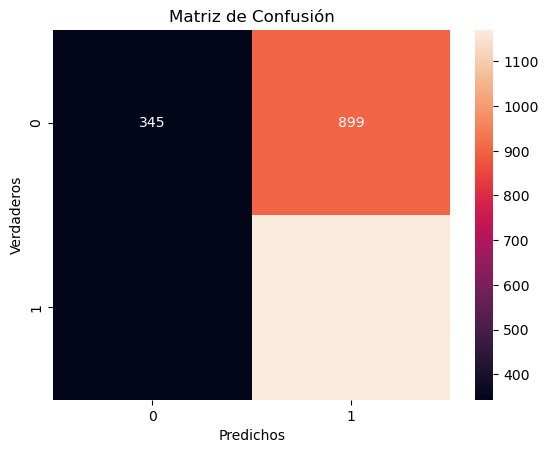

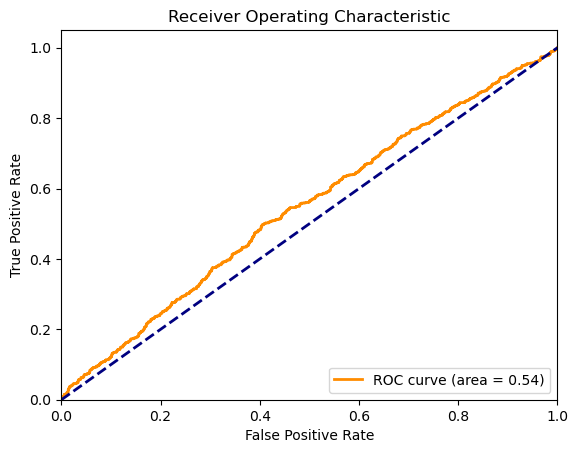

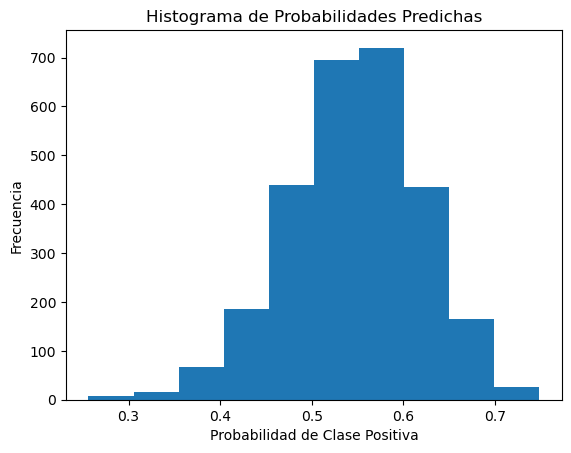

In [3]:

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
# Matriz de confusión
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

# Curva ROC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Histograma de Probabilidades Predichas
plt.hist(y_prob, bins=10)
plt.title('Histograma de Probabilidades Predichas')
plt.xlabel('Probabilidad de Clase Positiva')
plt.ylabel('Frecuencia')
plt.show()